# CUSTOMER CHURN PREDICTION

The project aims to develop a predictive model for customer churn in subscription-based services by analyzing historical data and using machine learning algorithms . Customer churn is the rate at which customers stop using a service, and the goal is to predict future churners.

#### Dataset Description:

* RowNumber: A unique identifier for each row in the dataset.
* CustomerId: A unique identifier for each customer.
* Surname: The surname of the customer.
* CreditScore: The credit score of the customer.
* Geography: The geographical location (e.g., country or region) of the customer.
* Gender: The gender of the customer.
* Age: The age of the customer.
* Tenure: The number of years the customer has been with the bank.
* Balance: The balance in the customer's bank account.
* NumOfProducts: The number of bank products the customer has (e.g., savings accounts, loans).
* HasCrCard: A binary variable indicating whether the customer has a credit card (1 for yes, 0 for no).
* IsActiveMember: A binary variable indicating whether the customer is an active member (1 for yes, 0 for no).
* EstimatedSalary: The estimated salary of the customer.
* Exited: A binary variable indicating whether the customer has exited (left) the bank (1 for yes, 0 for no).

# E.D.A

## Overview Stage

* Read the csv
* Look for basic information about the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Data Cleaning and Preprocessing

### Checking missing values

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* We have to deal with all possible version of (-1)

In [5]:
df.replace('-1', np.nan, inplace = True)

In [6]:
df.replace(-1, np.nan, inplace = True)

In [7]:
df.replace(-1.0, np.nan, inplace = True)

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No missing values found in the dataset

### Checking for duplicate values

In [9]:
duplicates = df[df.duplicated()]

if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


* No duplicate values found in the dataset

In [10]:
# Review the dataset
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## Data Exploration and Descriptive Statistics

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Check the columns on the dataset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

* Let's proceed to extract valuable insights from the dataset.

### Salary Distribution

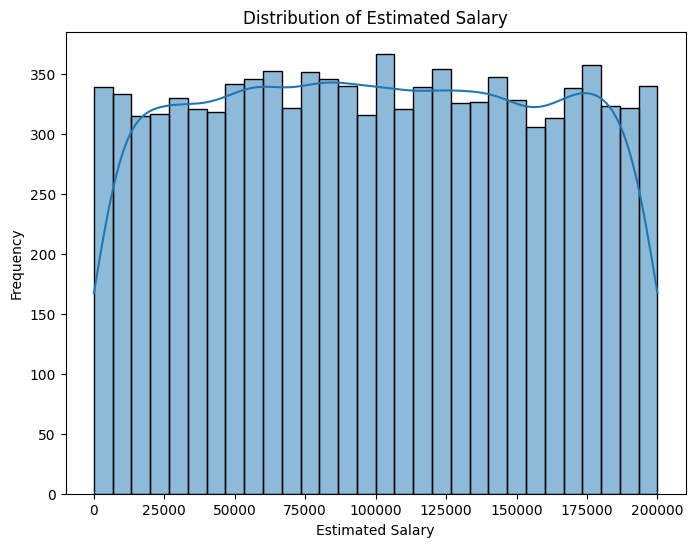

In [13]:
# Create a histogram
plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "EstimatedSalary", bins = 30, kde = True)
plt.title("Distribution of Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Frequency")
plt.show()

### Churn Analysis

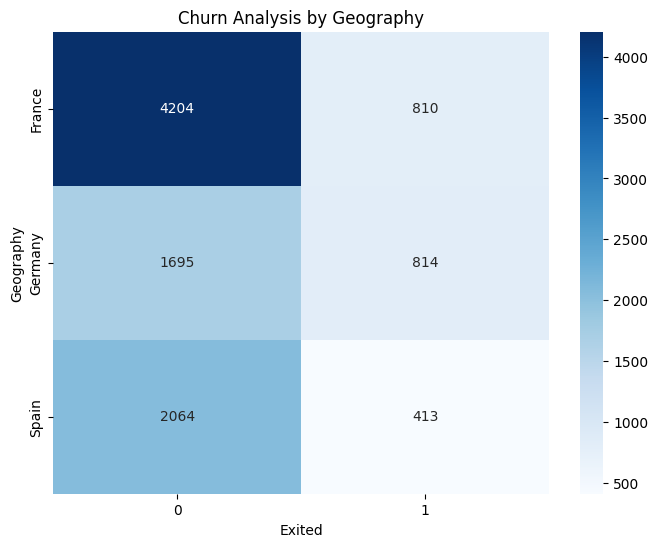

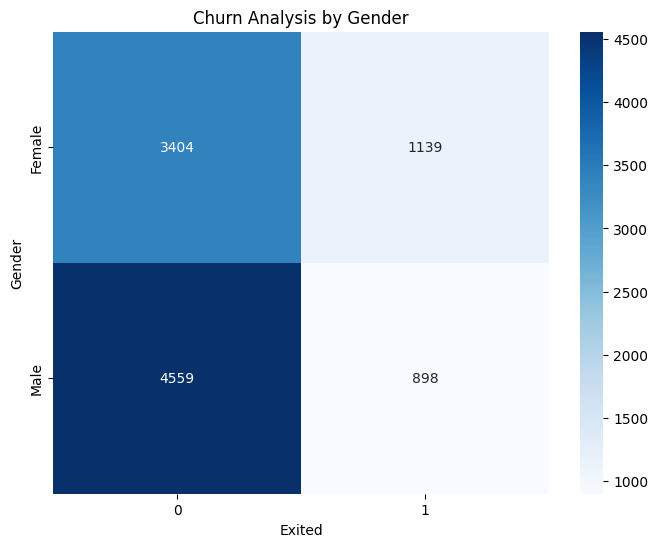

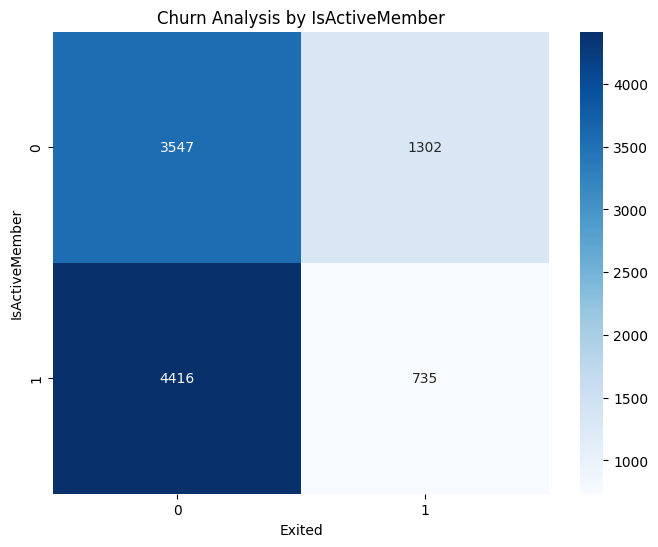

In [14]:
variables = ['Geography', 'Gender', 'IsActiveMember']

for variable in variables:
    churn = pd.crosstab(df[variable], df['Exited'])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(churn, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Churn Analysis by {variable}')
    plt.xlabel('Exited')
    plt.ylabel(variable)
    plt.show()

### Active Member Analysis

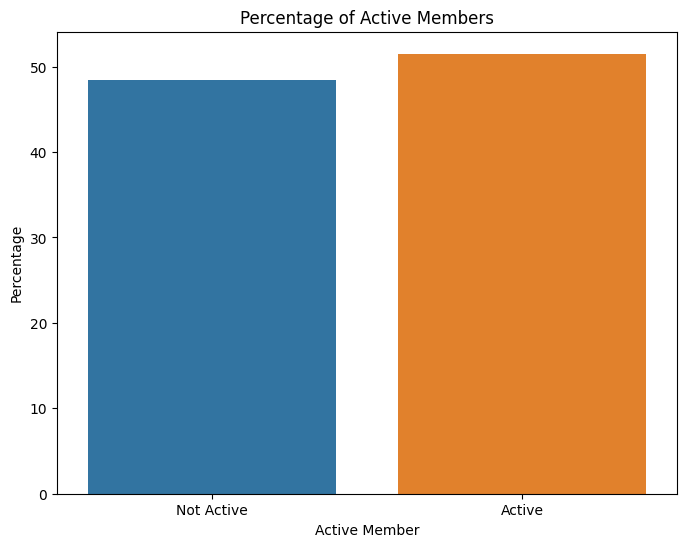

In [15]:
active_member_percentage = df['IsActiveMember'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=active_member_percentage.index, y=active_member_percentage.values)
plt.title("Percentage of Active Members")
plt.xlabel("Active Member")
plt.ylabel("Percentage")
plt.xticks([0, 1], ["Not Active", "Active"])
plt.show()

### Credit Card Usage

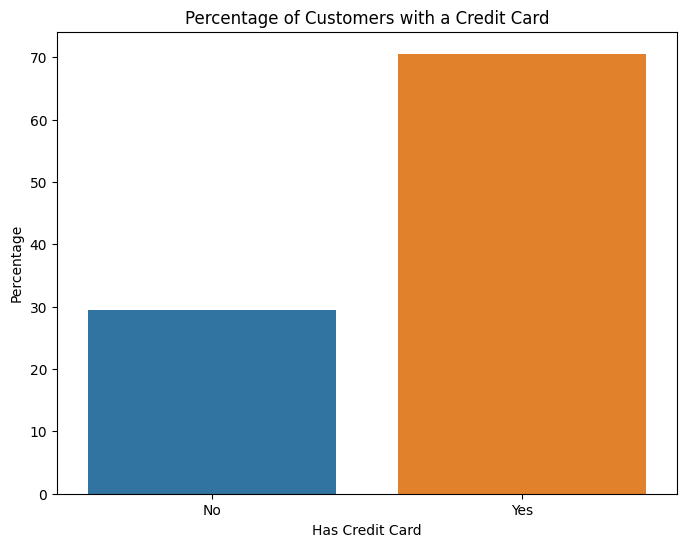

In [16]:
credit_card_percentage = df['HasCrCard'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=credit_card_percentage.index, y=credit_card_percentage.values)
plt.title("Percentage of Customers with a Credit Card")
plt.xlabel("Has Credit Card")
plt.ylabel("Percentage")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

### Correlation Analysis

In [17]:
# Review the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


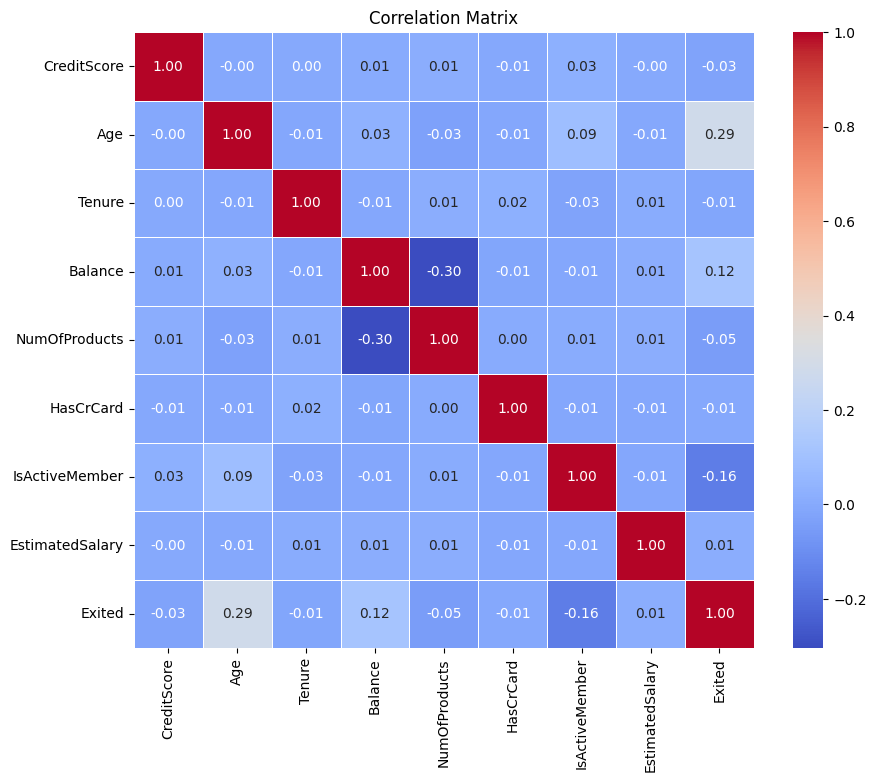

In [18]:
df_d = df.drop(['RowNumber', 'CustomerId', "Surname", "Gender", "Geography"], axis = 1)

correlation_matrix = df_d.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

* Age vs. Exited: There is a moderate positive correlation (0.285) between a customer's age and the likelihood of exiting the service. Older customers are more likely to leave.

* Balance vs. Exited: A mild positive correlation (0.118) suggests that customers with higher account balances are slightly more likely to stay.

* IsActiveMember vs. Exited: Being an active member is negatively correlated (-0.156) with exiting the service. Inactive members are more likely to leave.

* NumOfProducts vs. Exited: The number of bank products a customer has is negatively correlated (-0.048) with the likelihood of exiting. Customers with more products are less likely to leave.

* CreditScore vs. Exited: Credit score has a small negative correlation (-0.027) with the probability of exiting. It indicates a very slight influence on churn.

# Prepare the dataset for Machine Learning Models

In [19]:
# Review the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True, dtype = int)
df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [22]:
X = df_encoded.drop(['Exited'], axis = 1)
y = df_encoded['Exited']

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [24]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Machine Learning

## Data Splitting

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 1,
                                                   stratify = y)

## Standard Scaling the dataset


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Scanling the dataset
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Applying Machine Learning Models to the dataset

In [29]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression(C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, random_state=1)

In [32]:
y_pred_lr = lr.predict(X_test_std)
missclassifed_lr = (y_test != y_pred_lr).sum()

print('Missclassified samples: %d' % missclassifed_lr)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr))

accuracy_lr = lr.score(X_test_std, y_test)
print('Accuracy: %.2f' % accuracy_lr)

Missclassified samples: 571
Accuracy: 0.81
Accuracy: 0.81


### Support Vector Machine

In [33]:
from sklearn.svm import SVC

In [34]:
svm_k = SVC(kernel = 'rbf', C = 1.0, random_state = 1, gamma = 0.2)
svm_k.fit(X_train_std, y_train)

SVC(gamma=0.2, random_state=1)

In [35]:
y_pred_svm_k = svm_k.predict(X_test_std)
missclassifed_svm_k = (y_test != y_pred_svm_k).sum()

print('Missclassified samples: %d' % missclassifed_svm_k)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_svm_k))

accuracy_svm_k = svm_k.score(X_test_std, y_test)
print('Accuracy: %.2f' % accuracy_svm_k)

Missclassified samples: 435
Accuracy: 0.85
Accuracy: 0.85


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
tree = DecisionTreeClassifier(criterion = 'gini',
                             max_depth = 4,
                             random_state = 1)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [38]:
y_pred_tree = tree.predict(X_test_std)
missclassifed_tree = (y_test != y_pred_tree).sum()

print('Missclassified samples: %d' % missclassifed_tree)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tree))

accuracy_tree = tree.score(X_test_std, y_test)
print('Accuracy: %.2f' % accuracy_tree)

Missclassified samples: 446
Accuracy: 0.85
Accuracy: 0.85


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
forest = RandomForestClassifier(criterion = 'gini',
                               n_estimators = 25,
                               random_state = 1,
                               n_jobs = 2)
forest.fit(X_train_std, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=2, random_state=1)

In [41]:
y_pred_forest = forest.predict(X_test_std)
missclassifed_forest = (y_test != y_pred_forest).sum()

print('Missclassified samples: %d' % missclassifed_forest)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_forest))

accuracy_forest = forest.score(X_test_std, y_test)
print('Accuracy: %.2f' % accuracy_forest)

Missclassified samples: 423
Accuracy: 0.86
Accuracy: 0.86


### K-nearest neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors = 8,
                          p = 2,
                          metric = 'minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=8)

In [44]:
y_pred_knn = knn.predict(X_test_std)
missclassifed_knn = (y_test != y_pred_knn).sum()

print('Missclassified samples: %d' % missclassifed_knn)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_knn))

accuracy_knn = knn.score(X_test_std, y_test)
print('Accuracy: %.2f' % accuracy_knn)

Missclassified samples: 511
Accuracy: 0.83
Accuracy: 0.83


## Comparing the models

In [45]:
compare_table = {
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "KNN"],
    "Accuracy Score": [accuracy_lr, accuracy_svm_k, accuracy_tree, accuracy_forest, accuracy_knn],
    "Misclassified samples": [missclassifed_lr, missclassifed_svm_k, missclassifed_tree, missclassifed_forest, missclassifed_knn]
}

compare_table = pd.DataFrame(compare_table)
compare_table

,Model,Accuracy Score,Misclassified samples
0,Logistic Regression,0.809667,571
1,SVM,0.855000,435
2,Decision Tree,0.851333,446
3,Random Forest,0.859000,423
4,KNN,0.829667,511


# Hyperparameter Tuning

## Fine-Tuning Machine Learning Models via Grid Search

In [46]:
from sklearn.model_selection import GridSearchCV

### Decision Tree via Grid Search

In [47]:
gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(
 random_state=0),
param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
            scoring='accuracy',
            cv=2)

gs_tree.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
             scoring='accuracy')

In [48]:
print(gs_tree.best_score_)

0.8565714285714285


In [49]:
print(gs_tree.best_params_)

{'max_depth': 6}


In [50]:
clf_tree = gs_tree.best_estimator_
clf_tree.fit(X_train, y_train)

accuracy_score_tun_tree = clf_tree.score(X_test, y_test)
print('Test accuracy: %.3f' % accuracy_score_tun_tree)

Test accuracy: 0.856


### Random Forest via Grid Search


In [51]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gs_forest = GridSearchCV(estimator=RandomForestClassifier(
 random_state=0),
param_grid=param_grid,
scoring='accuracy',
cv=2)

gs_forest.fit(X_train, y_train)

E:\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "E:\anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda3\envs\tf\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "E:\anaconda3\envs\tf\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "E:\anaconda3\envs\tf\lib\site-packages\sklearn\utils\_para

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

In [52]:
print(gs_forest.best_score_)

0.8608571428571428


In [53]:
print(gs_forest.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [54]:
clf_forest = gs_forest.best_estimator_
clf_forest.fit(X_train, y_train)

accuracy_score_tun_forest = clf_forest.score(X_test, y_test)
print('Test accuracy: %.3f' % accuracy_score_tun_forest)

Test accuracy: 0.859


## Comparison after Grid Search

In [55]:
compare_table_tun = {
    "Model": ["Decision Tree", "Random Forest"],
    "Accuracy Score before grid search": [accuracy_tree, accuracy_forest],
    "Accuracy Score after grid search": [accuracy_score_tun_tree, accuracy_score_tun_forest]
}

compare_table_tun = pd.DataFrame(compare_table_tun)
compare_table_tun

,Model,Accuracy Score before grid search,Accuracy Score after grid search
0,Decision Tree,0.851333,0.856000
1,Random Forest,0.859000,0.859333


* For the Decision Tree, grid search improved accuracy slightly from 85.13% to 85.60%, indicating better hyperparameters.
* For Random Forest accuracy remained almost the same, suggesting default hyperparameters work well.

## Enhancing Grid Search with a Pipeline

### Pipeline without PCA 

In [56]:
from sklearn.pipeline import make_pipeline

In [57]:
pipe_svc = make_pipeline(StandardScaler(),
                        SVC(random_state = 1))

param_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': param_range,
                'svc__kernel': ['linear']},
            {'svc__C': param_range,
            'svc__gamma': param_range,
            'svc__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator = pipe_svc,
                 param_grid = param_grid,
                 scoring = "accuracy",
                 cv = 10,
                 n_jobs = 1)

gs_svc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(random_state=1))]),
             n_jobs=1,
             param_grid=[{'svc__C': [0.01, 0.1, 1.0, 10.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.01, 0.1, 1.0, 10.0],
                          'svc__gamma': [0.01, 0.1, 1.0, 10.0],
                          'svc__kernel': ['rbf']}],
             scoring='accuracy')

In [58]:
print(gs_svc.best_score_)

0.8541428571428572


In [59]:
print(gs_svc.best_params_)

{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [60]:
clf_svc = gs_svc.best_estimator_
clf_svc.fit(X_train, y_train)

accuracy_without_pca = clf_svc.score(X_test, y_test)
print('Test accuracy: %.3f' % accuracy_without_pca)

Test accuracy: 0.857


### Pipeline with PCA

In [61]:
from sklearn.decomposition import PCA

In [62]:
pipe_svc_pca = make_pipeline(StandardScaler(),
                         PCA(n_components = 2),
                        SVC(random_state = 1))

param_range = [0.01, 0.1, 1.0, 10.0]
param_grid = [{'svc__C': param_range,
                'svc__kernel': ['linear']},
            {'svc__C': param_range,
            'svc__gamma': param_range,
            'svc__kernel': ['rbf']}]

gs_svc_pca = GridSearchCV(estimator = pipe_svc_pca,
                 param_grid = param_grid,
                 scoring = "accuracy",
                 cv = 10,
                 n_jobs = 1)

gs_svc_pca.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('svc', SVC(random_state=1))]),
             n_jobs=1,
             param_grid=[{'svc__C': [0.01, 0.1, 1.0, 10.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.01, 0.1, 1.0, 10.0],
                          'svc__gamma': [0.01, 0.1, 1.0, 10.0],
                          'svc__kernel': ['rbf']}],
             scoring='accuracy')

In [63]:
print(gs_svc_pca.best_score_)

0.8074285714285715


In [64]:
clf_svc_pca = gs_svc_pca.best_estimator_
clf_svc_pca.fit(X_train, y_train)

accuracy_with_pca = clf_svc_pca.score(X_test, y_test)
print('Test accuracy: %.3f' % accuracy_with_pca)

Test accuracy: 0.809


## Comparison of Table with and without PCA

In [65]:
compare_table_pca = {
    "Model": ["SVC before Tuning", "SVC without PCA using Grid Search", "SVC with PCA using Grid Search"],
    "Test accuracy": [accuracy_svm_k, accuracy_without_pca, accuracy_with_pca]
}

compare_table_pca = pd.DataFrame(compare_table_pca)
compare_table_pca

,Model,Test accuracy
0,SVC before Tuning,0.855000
1,SVC without PCA using Grid Search,0.856667
2,SVC with PCA using Grid Search,0.809000


* SVC without PCA: Achieved a test accuracy of approximately 85.67%. The model maintains a high level of accuracy without dimensionality reduction.
* SVC with PCA: The accuracy is slightly reduced to around 80.90% when applying PCA, indicating a trade-off between dimensionality reduction and accuracy.